# 2. Sentiment analysis and aggregation

This template is used to get sentiment scores using VADER sentiment of all tweets per company. When calculating the VADER sentiment of each, they will be aggregated via the Fisher sentiment score to calculate the daily sentiment based on the number of likes, retweets, replies and quotes. Later, plots of the daily sentiment, daily number of interactions and daily number of tweets per company are returned to provide some intuition about the behaviour of these metrics.

This Jupyter Notebook provides the opportunity to quickly inspect and test daily sentiment scores.

## 2.1. Load packages and data

This class loads all relevant packages and dates

### 2.1.1. Load packages

First, import all classes necessary for the running of this files. Then import the relevant classes from the Python `thesis_code` library. 

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from datetime import datetime

# Load data that returns tweets
sys.path.insert(0, os.path.abspath('C:\\Users\\Jonas\\PycharmProjects\\TwitterSentimentGARCH2021\\Code\\Sentiment analysis and aggregation'))
from sentanalysis import TwitterSentimentAnalysis

### 2.1.2. Construct colors for plotting

Construct self-constructed colormap that will be used throughout this project

In [2]:
colors = ['seagreen', 'mediumaquamarine', 'steelblue', 'cornflowerblue', 'navy', 'black']

### 2.1.3. Load data

#### 2.1.3.1. Load data

In this section, load the data with company names. Also specify the storage location where the sentiment data must be stored.

In [3]:
# Specify location of data + file name and location of storage
data_loc = r'C:\Users\Jonas\Documents\Data'
file_name_comp = '\company_ticker_list_all.xlsx'

# Specify location where daily sentiment scores must be stored
store_loc = r'C:\Users\Jonas\Documents\Data\Sentiment'

# Access company names DataFrame
df_comp_names = pd.read_excel(data_loc + file_name_comp)

#### 2.1.3.2. Load return data

Load return data to get dates of trading days in the sample

In [4]:
# Specify a dictionary to store all daily returns in
dict_returns = {}

for tckr in df_comp_names.Symbol:
    returns_loc = f'C:\\Users\\Jonas\\Documents\\Data\\Returns\\{tckr}.csv'
    dict_returns[f'returns {tckr}'] = pd.read_csv(returns_loc)

## 2.2. Analysis of tweets 

This section performs the main calculations and analysis of the Twitter data. The returned daily sentiment data is stored in a seperate folder.

In [5]:
# Find tweets per company, all stored in one folder
for i in range(len(df_comp_names)):
    company_name = df_comp_names.iloc[i]['Company']

    tweets_data_loc = f'C:\\Users\\Jonas\\Documents\\Data\\Tweets\\tweets {company_name}.csv'
    
    # find tweets of current company, and store as df_tweets
    df_tweets = pd.read_csv(tweets_data_loc)
    print(df_tweets.shape)
    

C:\Users\Jonas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(2049809, 11)
(1024467, 11)
(80494, 11)
(218282, 11)
(49659, 10)
(398542, 11)
(1059333, 11)
(285626, 11)
(212297, 11)
(153085, 11)
(399564, 11)
(683628, 11)


### 2.2.1. Load and analyse tweets

Load tweets, retrieved via the Notebook `data_collection` (*consult this Notebook for reference*). Then, create a sentiment analysis object for every company specific list of tweets. The class `TwitterSentimentAnalysis` has several attributes, where public metrics are seperated, dates are splitted into time and date columns, to aggregate the tweets per date. Then, the VADER sentiment lexicon is exploited to calculated the sentiment score of each tweets of the dataset. The aggregation of the tweets is done via the Fisher score, which is calculated on a daily basis.

In [6]:
# Find tweets per company, all stored in one folder
for i in range(len(df_comp_names)):
    company_name = df_comp_names.iloc[i]['Company']

    tweets_data_loc = f'C:\\Users\\Jonas\\Documents\\Data\\Tweets\\tweets {company_name}.csv'
    
    # find tweets of current company, and store as df_tweets
    df_tweets = pd.read_csv(tweets_data_loc)
    
    # Sort tweets in descending order based on date and time
    df_tweets = df_tweets.sort_values(by=['created_at']).reset_index(drop=True)
    
    # Get unique trading days of company i
    trading_days = dict_returns[f'returns {df_comp_names.Symbol.iloc[i]}'].Date.unique().tolist()
    unique_trading_days = []
    for trading_day in trading_days:
        unique_trading_days.append((datetime.strptime(trading_day, '%Y-%m-%d')).date())

    # Construct for every class a sentiment object
    sentiment_obj = TwitterSentimentAnalysis(df_tweets, 'text', 'public_metrics', 'created_at', unique_trading_days)
    
    # Calculate daily sentiment based on the calculate_daily_sent method of the sentiment_obj. This dataframe also 
    # contains the number of daily interactions and the number of daily tweets, the other quantitative sentiment metrics.
    df_daily_sent = sentiment_obj.calculate_daily_sent()
    
    # Save daily sentiment dataframe as csv
    store_name = f'\sentiment {company_name}.csv'    
    df_daily_sent.to_csv(store_loc + store_name)

### 2.2.2. Display sentiment scores and quantititave metrics

This section will display daily sentiment scores, the number of tweets and the number of daily interactions. These are returned both as describtion DataFrames and in plots.

,Unnamed: 0,sentiment,n_interactions,n_tweets
count,2683.00000,2683.000000,2683.000000,2683.000000
mean,1341.00000,0.087390,2854.275065,769.194931
std,774.65971,0.139330,10347.338470,732.952965
min,0.00000,-0.616554,8.000000,67.000000
25%,670.50000,0.012845,419.000000,343.000000
50%,1341.00000,0.092515,1020.000000,537.000000
75%,2011.50000,0.167933,2559.000000,909.500000
max,2682.00000,0.807061,342495.000000,10948.000000


,Unnamed: 0,sentiment,n_interactions,n_tweets
count,2683.00000,2683.000000,2683.000000,2683.000000
mean,1341.00000,0.107878,4365.800224,384.807678
std,774.65971,0.140233,24121.907009,415.730858
min,0.00000,-0.797401,0.000000,13.000000
25%,670.50000,0.031950,86.000000,139.000000
50%,1341.00000,0.122655,383.000000,277.000000
75%,2011.50000,0.195549,2158.000000,469.000000
max,2682.00000,0.712681,826396.000000,5427.000000


,Unnamed: 0,sentiment,n_interactions,n_tweets
count,2660.000000,2660.000000,2660.000000,2660.000000
mean,1329.500000,-0.047578,351.697368,30.370301
std,768.020182,0.188057,2610.826735,102.458145
min,0.000000,-0.823680,0.000000,1.000000
25%,664.750000,-0.152019,7.000000,8.000000
50%,1329.500000,0.000000,30.000000,14.000000
75%,1994.250000,0.012147,127.000000,29.000000
max,2659.000000,0.847737,93485.000000,3496.000000


,Unnamed: 0,sentiment,n_interactions,n_tweets
count,2683.00000,2683.000000,2683.000000,2683.000000
mean,1341.00000,0.044021,306.518077,82.422288
std,774.65971,0.189909,2529.861196,264.537587
min,0.00000,-0.740014,0.000000,2.000000
25%,670.50000,-0.051714,14.000000,18.000000
50%,1341.00000,0.033233,45.000000,31.000000
75%,2011.50000,0.161198,147.500000,58.500000
max,2682.00000,0.803531,99757.000000,5380.000000


,Unnamed: 0,sentiment,n_interactions,n_tweets
count,2182.000000,2182.000000,2182.000000,2182.000000
mean,1090.500000,-0.026214,161.218148,22.907883
std,630.033465,0.132526,1685.473409,81.352682
min,0.000000,-0.649929,0.000000,1.000000
25%,545.250000,0.000000,0.000000,2.000000
50%,1090.500000,0.000000,5.000000,5.000000
75%,1635.750000,0.000000,37.000000,13.000000
max,2181.000000,0.849530,71804.000000,2237.000000


,Unnamed: 0,sentiment,n_interactions,n_tweets
count,2683.00000,2683.000000,2683.000000,2683.000000
mean,1341.00000,-0.038562,1355.149460,149.487141
std,774.65971,0.166943,8777.274166,205.092075
min,0.00000,-0.804595,0.000000,20.000000
25%,670.50000,-0.131426,96.000000,63.000000
50%,1341.00000,-0.040934,232.000000,96.000000
75%,2011.50000,0.055472,622.000000,164.000000
max,2682.00000,0.833133,211077.000000,4644.000000


,Unnamed: 0,sentiment,n_interactions,n_tweets
count,2683.00000,2683.000000,2683.000000,2683.000000
mean,1341.00000,0.193486,1458.179650,397.395080
std,774.65971,0.133854,3594.824199,352.262405
min,0.00000,-0.519809,4.000000,35.000000
25%,670.50000,0.126088,161.000000,204.000000
50%,1341.00000,0.210613,515.000000,303.000000
75%,2011.50000,0.282224,1470.000000,468.000000
max,2682.00000,0.670540,91835.000000,4636.000000


,Unnamed: 0,sentiment,n_interactions,n_tweets
count,2683.00000,2683.000000,2.683000e+03,2683.000000
mean,1341.00000,-0.022413,1.386084e+03,107.177786
std,774.65971,0.163884,2.034519e+04,148.353708
min,0.00000,-0.766408,0.000000e+00,5.000000
25%,670.50000,-0.127462,4.500000e+01,44.000000
50%,1341.00000,-0.020528,1.600000e+02,75.000000
75%,2011.50000,0.076945,6.495000e+02,125.500000
max,2682.00000,0.696555,1.005844e+06,3906.000000


,Unnamed: 0,sentiment,n_interactions,n_tweets
count,2683.00000,2683.000000,2683.000000,2683.000000
mean,1341.00000,0.125033,759.204622,79.866567
std,774.65971,0.171853,6384.707103,103.218292
min,0.00000,-0.824867,0.000000,6.000000
25%,670.50000,0.029708,46.000000,34.000000
50%,1341.00000,0.129304,118.000000,53.000000
75%,2011.50000,0.231029,330.500000,91.000000
max,2682.00000,0.835945,271552.000000,1871.000000


,Unnamed: 0,sentiment,n_interactions,n_tweets
count,2668.000000,2668.000000,2668.000000,2668.000000
mean,1333.500000,0.186414,267.414168,57.709520
std,770.329583,0.172290,751.037173,63.496183
min,0.000000,-0.466678,0.000000,1.000000
25%,666.750000,0.000000,18.000000,20.000000
50%,1333.500000,0.209240,91.000000,46.000000
75%,2000.250000,0.326666,249.000000,75.000000
max,2667.000000,0.719527,12278.000000,1365.000000


,Unnamed: 0,sentiment,n_interactions,n_tweets
count,2673.000000,2673.000000,2673.000000,2673.000000
mean,1336.000000,0.129462,1742.137673,150.499065
std,771.772959,0.173363,6669.724565,243.480890
min,0.000000,-0.715401,0.000000,1.000000
25%,668.000000,0.000000,15.000000,28.000000
50%,1336.000000,0.129892,184.000000,93.000000
75%,2004.000000,0.251693,1185.000000,180.000000
max,2672.000000,0.697660,189527.000000,4681.000000


,Unnamed: 0,sentiment,n_interactions,n_tweets
count,2683.00000,2683.000000,2683.000000,2683.000000
mean,1341.00000,0.036431,2857.209467,260.791278
std,774.65971,0.148954,19308.832803,311.634434
min,0.00000,-0.883480,0.000000,31.000000
25%,670.50000,-0.042309,146.000000,120.000000
50%,1341.00000,0.035894,392.000000,172.000000
75%,2011.50000,0.118697,1082.500000,296.000000
max,2682.00000,0.747288,577531.000000,7149.000000


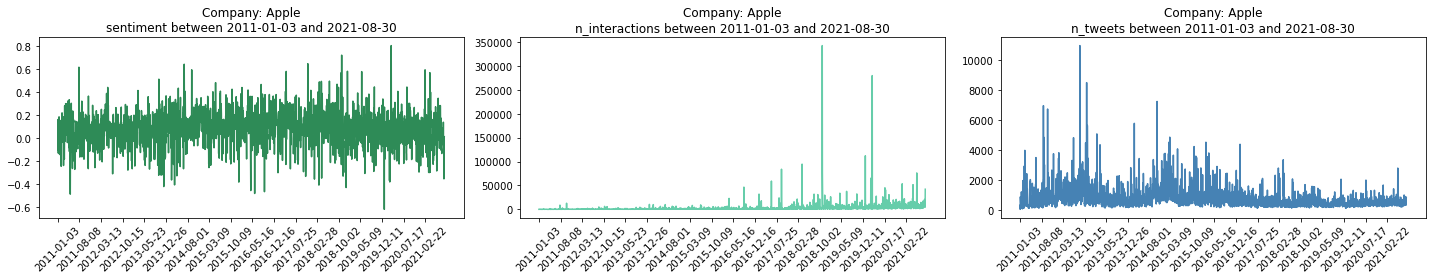

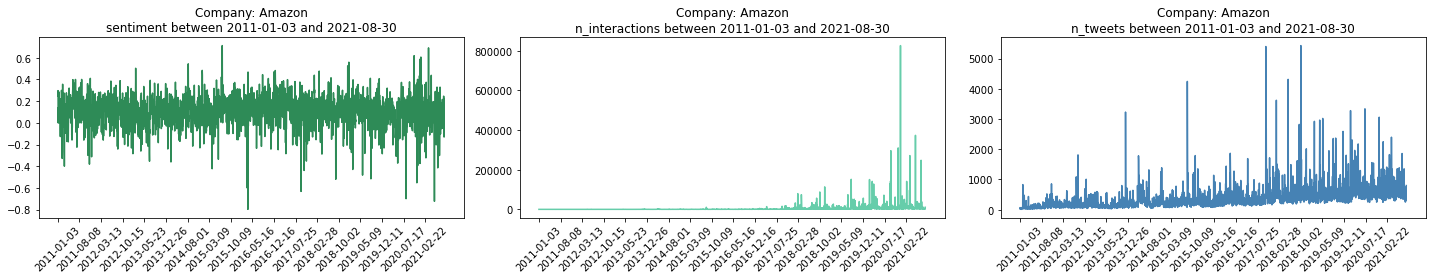

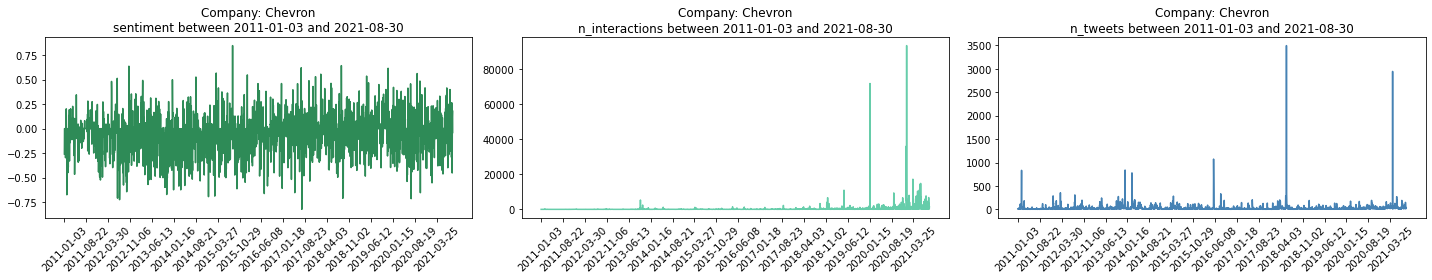

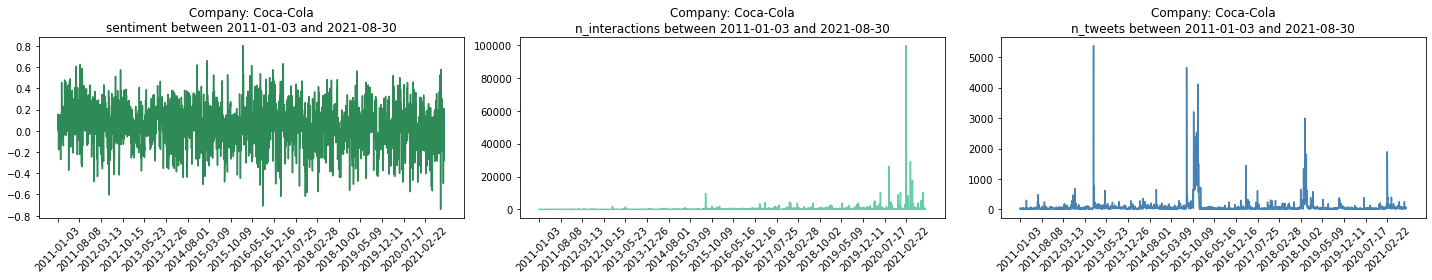

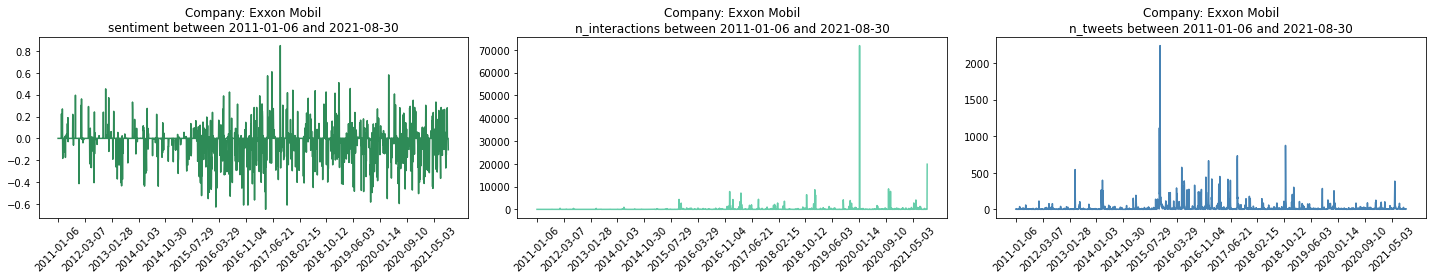

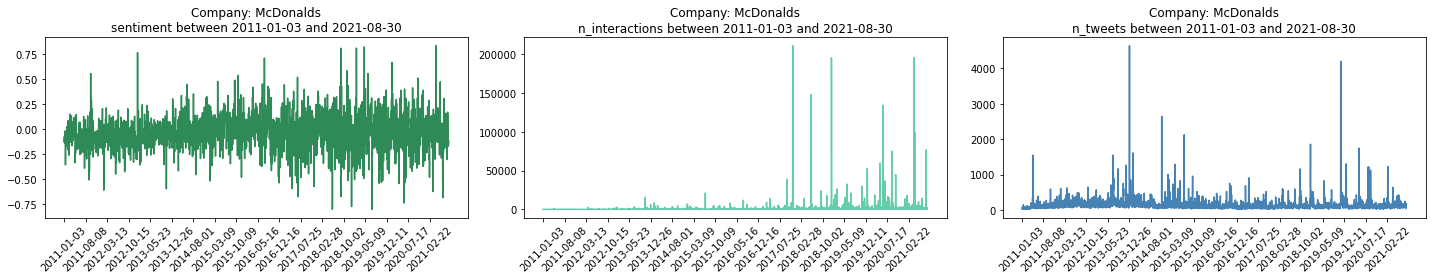

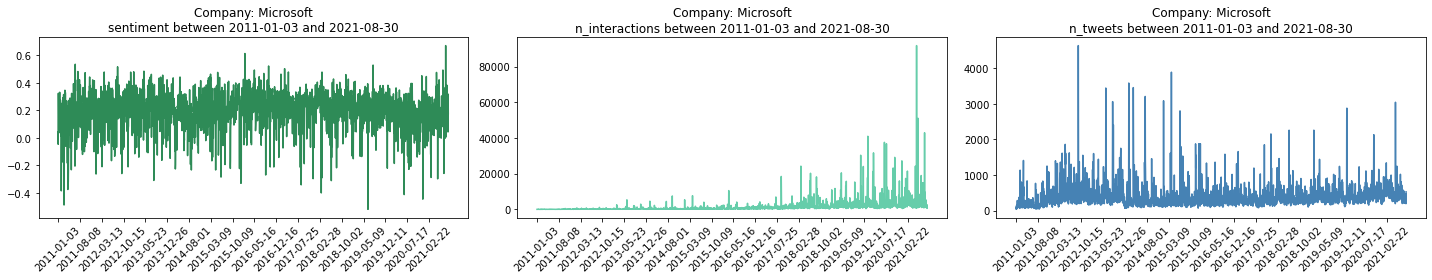

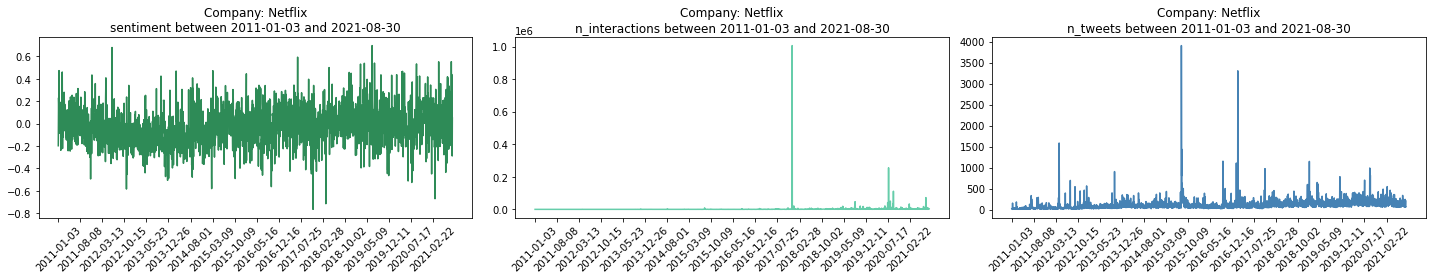

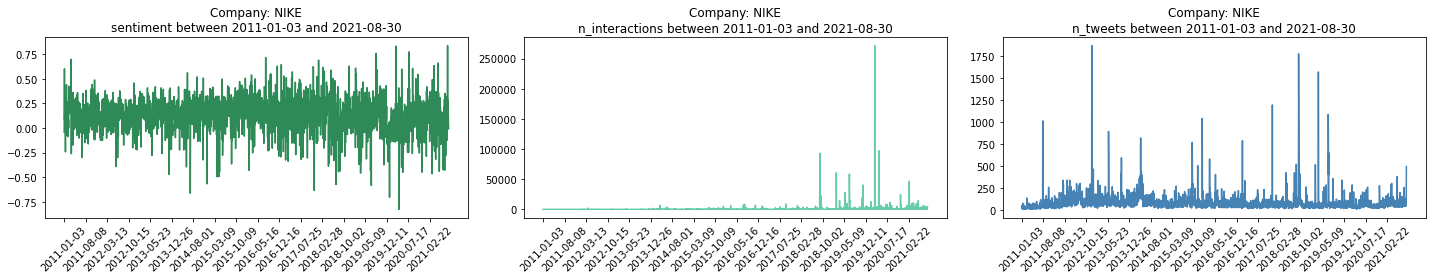

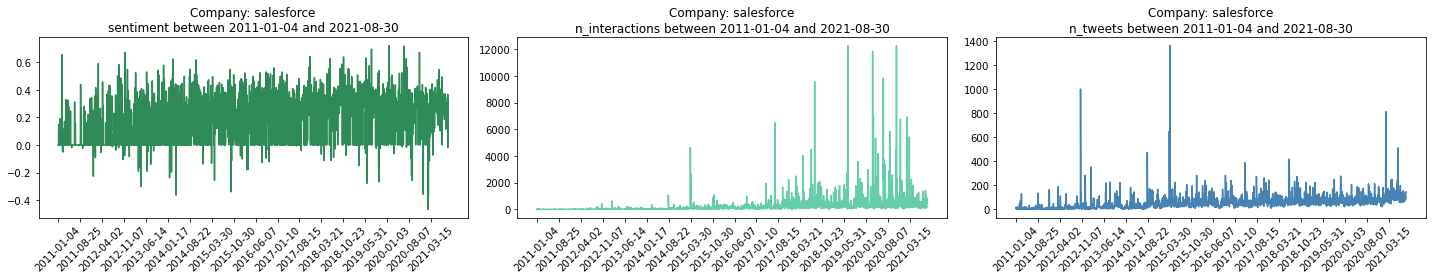

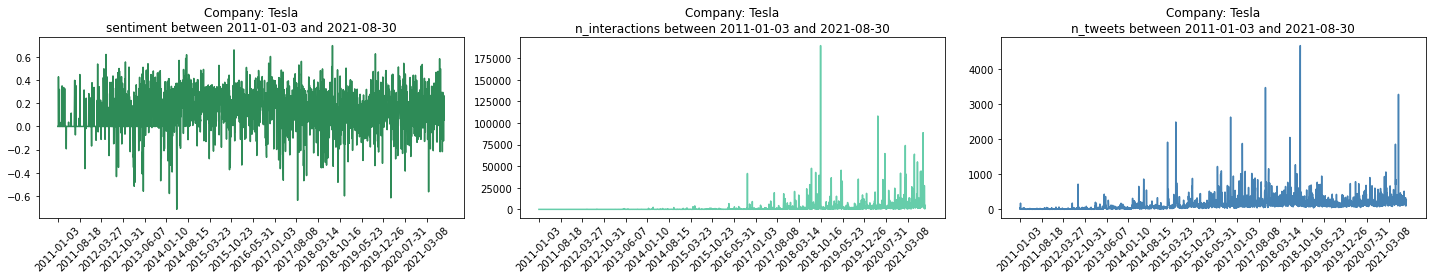

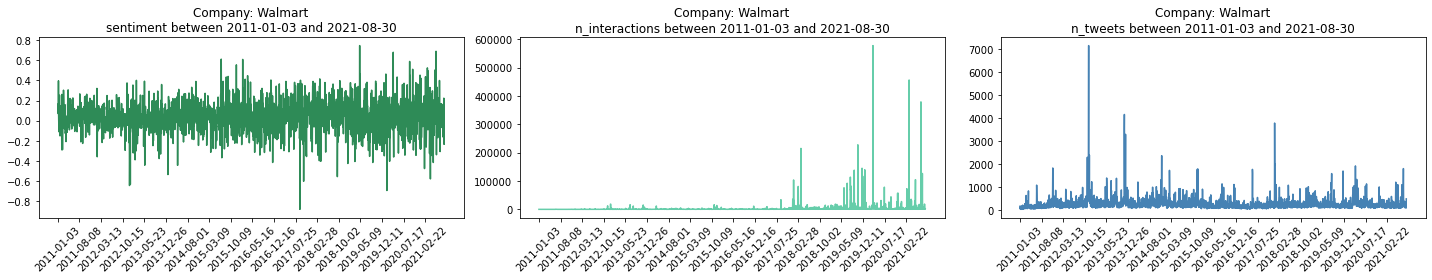

In [8]:
# Find tweets per company, all stored in one folder
for i in range(len(df_comp_names)):
    company_name = df_comp_names.iloc[i]['Company']
   
    # Save daily sentiment dataframe as csv
    store_name = f'\sentiment {company_name}.csv'    
    df_daily = pd.read_csv(store_loc + store_name)
    display(df_daily.describe())
    
    fig, axs = plt.subplots(figsize = (20,4), nrows = 1, ncols = 3)
    
    first_date, last_date = df_daily.date.iloc[0], df_daily.date.iloc[-1]
    n = 150  # keeps every 30th label (around 1 month)

    for j in range(len(axs)):
        columns = df_daily.columns
        # If the metric is not sentiment score, plot the log change of the metrics (number of interactions and number of tweets)
        if j != 0:
            axs[j].plot(df_daily.date, df_daily[columns[j+3]], c=colors[j])
        else:
            axs[j].plot(df_daily.date, df_daily.sentiment, c=colors[j])
        
        # Set title and xticklabels
        axs[j].set_title(f'Company: {company_name}' + '\n' f'{columns[j+3]} between {first_date} and {last_date}')
        axs[j].set_xticks(axs[j].get_xticks()[::n])
        
        axs[j].tick_params(axis='x', labelrotation = 45)
    
    plt.tight_layout()
    
    # Store figures as PNG
    fig.savefig(os.path.join(store_loc, f'sentiment metrics {company_name}'))
    

------------------------------
------------------------------